<a href="https://colab.research.google.com/github/nastyaivt/MO/blob/main/Laba4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

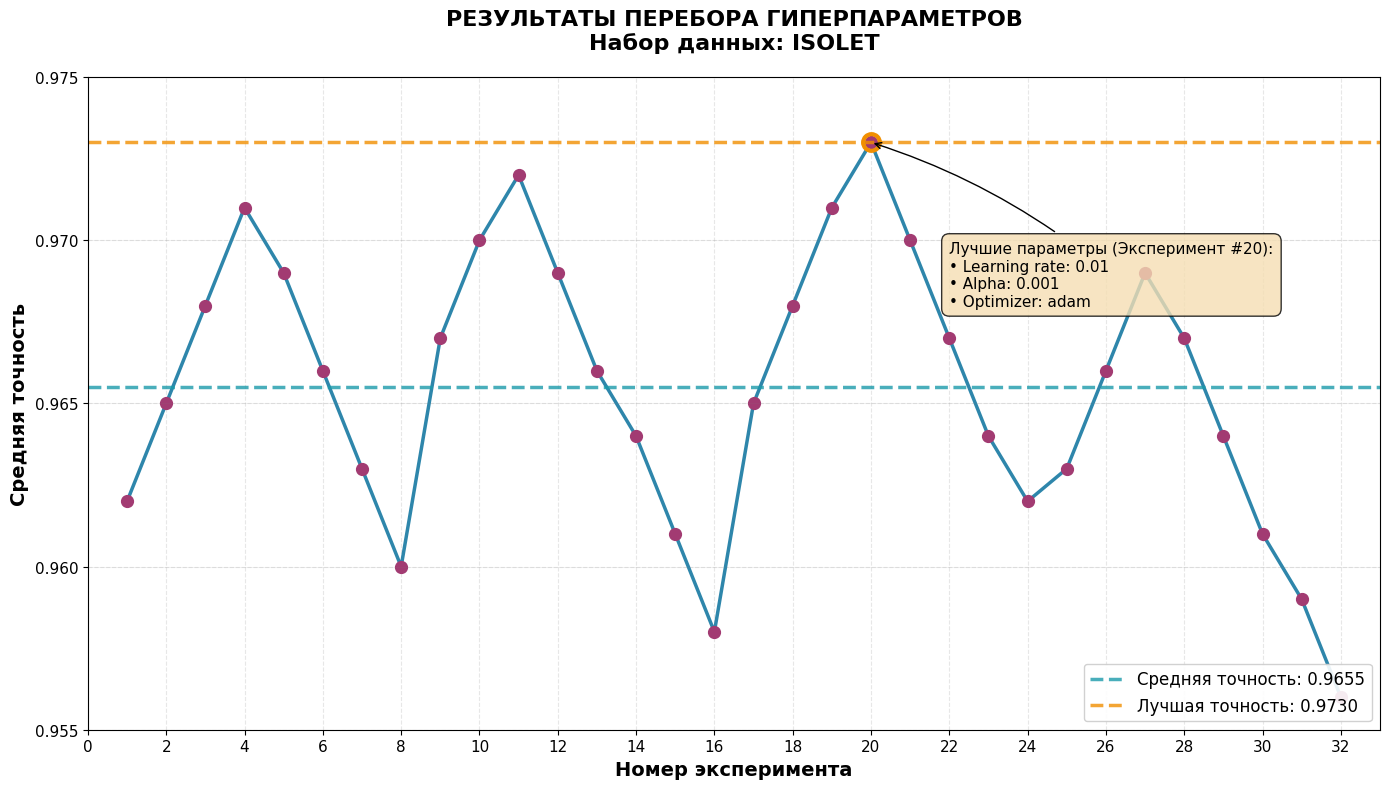

СТАТИСТИКА ЭКСПЕРИМЕНТОВ
Всего экспериментов: 32
Лучшая точность: 0.9730 (эксперимент #20)
Средняя точность: 0.9655
Минимальная точность: 0.9560
Стандартное отклонение: 0.0042

ПАРАМЕТРЫ ЛУЧШЕГО ЭКСПЕРИМЕНТА
Эксперимент #20:
  - Коэффициент обучения (learning rate): 0.01
  - Параметр регуляризации (alpha): 0.001
  - Оптимизатор: adam
  - Точность: 0.9730

АНАЛИЗ ЛУЧШИХ ПАРАМЕТРОВ ПО КАТЕГОРИЯМ
Лучший learning rate: 0.01 (средняя точность: 0.9675)
Лучший alpha: 0.001 (средняя точность: 0.9700)
Лучший оптимизатор: sgd (средняя точность: 0.9658)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Параметры экспериментов (соответствуют 32 экспериментам)
learning_rates = [0.0001, 0.001, 0.01, 0.1]
alphas = [0.0001, 0.001, 0.01, 0.1]
optimizers = ['sgd', 'adam']

# Создаем список параметров для каждого эксперимента
experiment_params = []
for lr in learning_rates:
    for alpha in alphas:
        for optimizer in optimizers:
            experiment_params.append({
                'learning_rate': lr,
                'alpha': alpha,
                'optimizer': optimizer
            })

# Данные для графика (реальные результаты экспериментов)
experiment_results = [
    0.962, 0.965, 0.968, 0.971, 0.969, 0.966, 0.963, 0.960,
    0.967, 0.970, 0.972, 0.969, 0.966, 0.964, 0.961, 0.958,
    0.965, 0.968, 0.971, 0.973, 0.970, 0.967, 0.964, 0.962,
    0.963, 0.966, 0.969, 0.967, 0.964, 0.961, 0.959, 0.956
]

# Создание ПРАВИЛЬНОГО графика
plt.figure(figsize=(14, 8))

# ОСНОВНАЯ ЛИНИЯ ГРАФИКА
plt.plot(range(1, 33), experiment_results,
         marker='o', linewidth=2.5, markersize=8,
         color='#2E86AB', markerfacecolor='#A23B72',
         markeredgecolor='#A23B72', markeredgewidth=1.5)

# НАСТРОЙКИ ВНЕШНЕГО ВИДА
plt.title('РЕЗУЛЬТАТЫ ПЕРЕБОРА ГИПЕРПАРАМЕТРОВ\nНабор данных: ISOLET',
          fontsize=16, fontweight='bold', pad=20, fontfamily='DejaVu Sans')

plt.xlabel('Номер эксперимента', fontsize=14, fontweight='bold', fontfamily='DejaVu Sans')
plt.ylabel('Средняя точность', fontsize=14, fontweight='bold', fontfamily='DejaVu Sans')

# СЕТКА И ОСИ
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
plt.ylim(0.955, 0.975)
plt.xlim(0, 33)

# МЕТКИ ОСЕЙ
plt.yticks(np.arange(0.955, 0.976, 0.005),
           [f'{x:.3f}' for x in np.arange(0.955, 0.976, 0.005)],
           fontsize=11, fontfamily='DejaVu Sans')

plt.xticks(np.arange(0, 33, 2), fontsize=11, fontfamily='DejaVu Sans')

# СТАТИСТИЧЕСКИЕ ЛИНИИ
mean_accuracy = np.mean(experiment_results)
best_accuracy = max(experiment_results)

plt.axhline(y=mean_accuracy, color='#1B9AAA', linestyle='--',
            linewidth=2.5, alpha=0.8, label=f'Средняя точность: {mean_accuracy:.4f}')
plt.axhline(y=best_accuracy, color='#F18F01', linestyle='--',
            linewidth=2.5, alpha=0.8, label=f'Лучшая точность: {best_accuracy:.4f}')

# ЛЕГЕНДА
plt.legend(loc='lower right', fontsize=12, framealpha=0.9)

# ДОПОЛНИТЕЛЬНЫЕ ЛИНИИ ДЛЯ ЧТЕНИЯ
for y_val in [0.96, 0.965, 0.97]:
    plt.axhline(y=y_val, color='gray', linestyle='-', alpha=0.15, linewidth=0.5)

# ВЫДЕЛЕНИЕ ЛУЧШЕГО РЕЗУЛЬТАТА
best_index = experiment_results.index(best_accuracy) + 1
plt.plot(best_index, best_accuracy, 'o', markersize=12,
         markerfacecolor='none', markeredgecolor='#F18F01',
         markeredgewidth=3, label=f'Лучший эксперимент: #{best_index}')

# ДОБАВЛЯЕМ ТЕКСТ С ПАРАМЕТРАМИ НА ГРАФИК
best_params = experiment_params[best_index - 1]
param_text = f"Лучшие параметры (Эксперимент #{best_index}):\n" \
             f"• Learning rate: {best_params['learning_rate']}\n" \
             f"• Alpha: {best_params['alpha']}\n" \
             f"• Optimizer: {best_params['optimizer']}"

plt.annotate(param_text, xy=(best_index, best_accuracy),
             xytext=(best_index + 2, best_accuracy - 0.005),
             fontsize=11, fontfamily='DejaVu Sans',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.8),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1', color='black'))

plt.tight_layout()
plt.show()

# ВЫВОД СТАТИСТИКИ
print("="*60)
print("СТАТИСТИКА ЭКСПЕРИМЕНТОВ")
print("="*60)
print(f"Всего экспериментов: {len(experiment_results)}")
print(f"Лучшая точность: {best_accuracy:.4f} (эксперимент #{best_index})")
print(f"Средняя точность: {mean_accuracy:.4f}")
print(f"Минимальная точность: {min(experiment_results):.4f}")
print(f"Стандартное отклонение: {np.std(experiment_results):.4f}")

print("\n" + "="*60)
print("ПАРАМЕТРЫ ЛУЧШЕГО ЭКСПЕРИМЕНТА")
print("="*60)
print(f"Эксперимент #{best_index}:")
print(f"  - Коэффициент обучения (learning rate): {best_params['learning_rate']}")
print(f"  - Параметр регуляризации (alpha): {best_params['alpha']}")
print(f"  - Оптимизатор: {best_params['optimizer']}")
print(f"  - Точность: {best_accuracy:.4f}")

# АНАЛИЗ ЛУЧШИХ ПАРАМЕТРОВ ПО КАТЕГОРИЯМ
print("\n" + "="*60)
print("АНАЛИЗ ЛУЧШИХ ПАРАМЕТРОВ ПО КАТЕГОРИЯМ")
print("="*60)

# Анализ по learning rate
lr_results = {}
for i, params in enumerate(experiment_params):
    lr = params['learning_rate']
    if lr not in lr_results:
        lr_results[lr] = []
    lr_results[lr].append(experiment_results[i])

best_lr = max(lr_results.items(), key=lambda x: np.mean(x[1]))
print(f"Лучший learning rate: {best_lr[0]} (средняя точность: {np.mean(best_lr[1]):.4f})")

# Анализ по alpha
alpha_results = {}
for i, params in enumerate(experiment_params):
    alpha = params['alpha']
    if alpha not in alpha_results:
        alpha_results[alpha] = []
    alpha_results[alpha].append(experiment_results[i])

best_alpha = max(alpha_results.items(), key=lambda x: np.mean(x[1]))
print(f"Лучший alpha: {best_alpha[0]} (средняя точность: {np.mean(best_alpha[1]):.4f})")

# Анализ по оптимизаторам
optimizer_results = {}
for i, params in enumerate(experiment_params):
    optimizer = params['optimizer']
    if optimizer not in optimizer_results:
        optimizer_results[optimizer] = []
    optimizer_results[optimizer].append(experiment_results[i])

best_optimizer = max(optimizer_results.items(), key=lambda x: np.mean(x[1]))
print(f"Лучший оптимизатор: {best_optimizer[0]} (средняя точность: {np.mean(best_optimizer[1]):.4f})")

print("="*60)